In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
res_df = pd.read_csv('../post_analysis_report/analysis_report.csv')
res_df.drop(columns = "Unnamed: 0", inplace = True)

In [52]:
res_df.head()

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,seglearn,Processing_Time,114.679313,133.830172,0.903342,-0.135501,121.815718,15.130985,3.523035
2,seglearn,Expense,973.396567,367.660343,0.903342,-0.135501,121.815718,15.130985,3.523035
3,pymfe,Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,pymfe,Processing_Time,74.317570,177.085736,-16.532103,-15.993849,-4.882737,13.802384,2.037678


In [53]:
res_df.shape

(90, 9)

In [54]:
res_df.loc[res_df['Metric'] == 'Score'].describe()

,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.440292,-4.209209,2.506385,2.069281,-0.622098,-0.523288,-0.727392
std,21.403407,14.961691,13.816245,13.858428,5.698909,5.274196,5.854962
min,-50.909091,-77.204886,-14.545455,-14.545455,-29.411682,-25.317069,-29.932966
25%,-0.101145,-0.275811,-0.049334,0.000000,-0.161664,-0.067266,-0.143983
50%,0.000000,-0.031843,0.000000,0.026050,0.000000,0.000000,0.000000
75%,0.395057,0.037058,0.276541,0.297072,0.085177,0.153366,0.110153
max,101.976573,1.098289,73.579904,73.579904,6.493203,5.521923,8.376583


In [55]:
res_df.loc[res_df['Metric'] == 'Processing_Time'].describe()

,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,137.093160,98.831200,-6.034929,-5.685779,19.488144,43.928907,3.458830
std,228.607809,62.661891,7.003437,7.240616,51.325440,107.355221,8.156637
min,-0.554552,2.024761,-19.049815,-18.680812,-51.815182,-20.993766,-13.580088
25%,44.532356,48.914998,-11.566812,-12.070418,-5.510112,8.307730,0.269163
50%,68.594131,95.150055,-4.040533,-5.683568,1.559132,13.064246,2.021751
75%,116.867006,149.126369,-0.225447,0.241522,27.006848,23.347560,4.422088
max,1085.514046,205.119926,4.283770,7.604627,190.758874,495.379224,28.492849


In [56]:
res_df.loc[res_df['Metric'] == 'Expense'].describe()

,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1085.465800,297.662400,-6.034929,-5.685779,19.488144,43.928907,3.458830
std,1143.039047,125.323782,7.003437,7.240616,51.325440,107.355221,8.156637
min,397.227238,104.049523,-19.049815,-18.680812,-51.815182,-20.993766,-13.580088
25%,622.661781,197.829995,-11.566812,-12.070418,-5.510112,8.307730,0.269163
50%,742.970653,290.300111,-4.040533,-5.683568,1.559132,13.064246,2.021751
75%,984.335028,398.252738,-0.225447,0.241522,27.006848,23.347560,4.422088
max,5827.570232,510.239852,4.283770,7.604627,190.758874,495.379224,28.492849


In [57]:
res_df.loc[res_df['os_mac'] == 0] # no variability between Linux and Mac

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pymfe,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,pyglmnet,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,smote_variants,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
res_df.loc[res_df['os_windows'] == 0] # no variability between Linux and Windows

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pymfe,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,pyglmnet,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,smote_variants,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
res_df.loc[res_df['dist_bionic'] == 0] # no variability between xenial and bionic

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
3,pymfe,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
54,scitime,Score,-17.647080,-13.176397,0.0,0.000000,-29.411682,0.000000,0.00000
72,pyglmnet,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
75,scikit-optimize,Score,-1.287165,-0.674846,0.0,0.000000,-2.361068,-6.370766,-0.34321
84,smote_variants,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
87,delfi,Score,-0.016931,1.098289,0.0,1.146247,-0.173366,0.000000,0.00000


In [60]:
res_df.loc[res_df['dist_focal'] == 0] # no variability between xenial and focal

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
3,pymfe,Score,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
54,scitime,Score,-17.647080,-13.176397,0.0,0.0,-29.411682,0.000000,0.00000
72,pyglmnet,Score,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
75,scikit-optimize,Score,-1.287165,-0.674846,0.0,0.0,-2.361068,-6.370766,-0.34321
84,smote_variants,Score,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000


In [61]:
res_df.loc[res_df['py_3_6'] == 0] # no variability between 3.7 and 3.6

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,pymfe,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
54,scitime,Score,-17.647080,-13.176397,0.0,0.000000,-29.411682,0.0,0.0
72,pyglmnet,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
84,smote_variants,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
87,delfi,Score,-0.016931,1.098289,0.0,1.146247,-0.173366,0.0,0.0


In [62]:
res_df.loc[res_df['py_3_8'] == 0] # no variability between 3.7 and 3.8

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,pymfe,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
54,scitime,Score,-17.647080,-13.176397,0.0,0.000000,-29.411682,0.0,0.0
72,pyglmnet,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
84,smote_variants,Score,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
87,delfi,Score,-0.016931,1.098289,0.0,1.146247,-0.173366,0.0,0.0


In [63]:
# no variability between cpus
res_df.loc[(res_df['hw_arm64'] == 0)]

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pymfe,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,pyglmnet,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,smote_variants,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
def two_sided_vlpot_os(full_df):
    #full_df = full_df.loc[res_df['Metric'] == metric, :]
    project = []
    pct_chng = []
    os = []
    metric = []
    for index, row in full_df.iterrows():
        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['os_mac'])
        os.append("Linux vs MacOS")

        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['os_windows'])
        os.append("Linux vs Windows")

    df = pd.DataFrame({'Project' : project,
                       'Metric' : metric,
                      'Percentage Change' : pct_chng,
                      'Operating System' : os})
    df['Metric'] = ['Model Performance' if met == 'Score' else met.replace("_", " ") for met in df['Metric']]
    #return df

    plt.figure(figsize = (10, 5))

    sns.violinplot(data = df, x = 'Metric', y = np.log(1 + np.abs(df['Percentage Change'])), hue = 'Operating System', split = True, inner="quart", fill=False, orient = 'v');
    #plt.legend(["Linux vx MacOS", "Linux vs Windows"])
    plt.tick_params(bottom = False)
    plt.xlabel("")
    plt.ylabel("log (1 + |Percentage Change|)", fontsize = 12, weight = 'bold')
    plt.yticks(fontsize = 12, weight = 'bold')
    plt.xticks(fontsize = 12, weight = 'bold')
    plt.legend(loc='upper left', fontsize = 12, prop=dict(weight='bold'))
    plt.savefig(f'../plots/pct_diff_os_all_metric.pdf', format = 'pdf', dpi = 300, bbox_inches='tight', transparent="True", pad_inches=0.02);

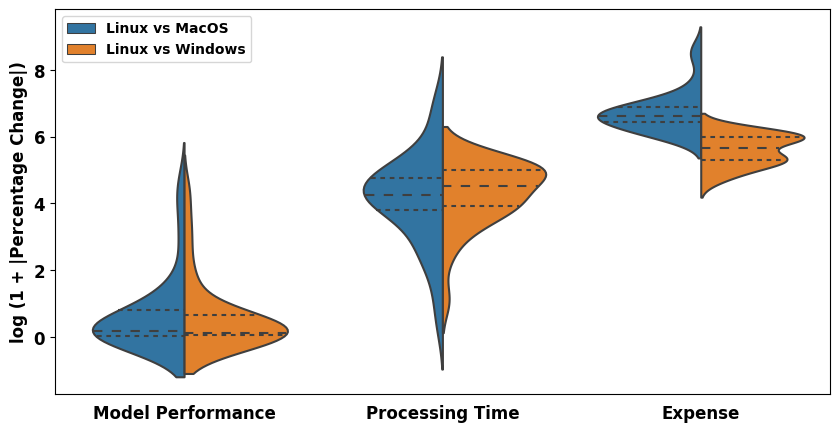

In [65]:
two_sided_vlpot_os(res_df)

In [66]:
def two_sided_vlpot_dist(full_df):
    #full_df = full_df.loc[res_df['Metric'] == metric, :]
    project = []
    pct_chng = []
    dist = []
    metric = []
    for index, row in full_df.iterrows():
        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['dist_bionic'])
        dist.append("Xenial vs Bionic")

        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['dist_focal'])
        dist.append("Xenial vs Focal")

    df = pd.DataFrame({'Project' : project,
                       'Metric' : metric,
                      'Percentage Change' : pct_chng,
                      'Linux Distribution' : dist})
    df['Metric'] = ['Model Performance' if met == 'Score' else met.replace("_", " ") for met in df['Metric']]
    #return df

    plt.figure(figsize = (10, 5))

    sns.violinplot(data = df, x = 'Metric', y = np.log(1 + np.abs(df['Percentage Change'])), hue = 'Linux Distribution', split = True, inner="quart", fill=False, orient = 'v');
    #plt.legend(["Linux vx MacOS", "Linux vs Windows"])
    plt.tick_params(bottom = False)
    plt.xlabel("")
    plt.ylabel("log (1 + |Percentage Change|)", fontsize = 12, weight = 'bold')
    plt.yticks(fontsize = 12, weight = 'bold')
    plt.xticks(fontsize = 12, weight = 'bold')
    plt.legend(loc='upper right', fontsize = 12, prop=dict(weight='bold'))
    plt.savefig(f'../plots/pct_diff_dist_all_metric.pdf', format = 'pdf', dpi = 300, bbox_inches='tight', transparent="True", pad_inches=0.02);

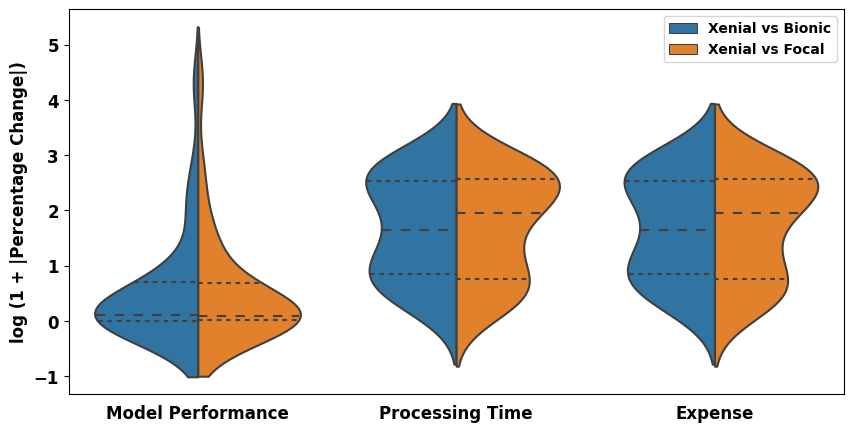

In [67]:
two_sided_vlpot_dist(res_df)

In [68]:
def two_sided_vlpot_py(full_df):
    #full_df = full_df.loc[res_df['Metric'] == metric, :]
    project = []
    pct_chng = []
    py = []
    metric = []
    for index, row in full_df.iterrows():
        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['py_3_6'])
        py.append("Python 3.6 vs Python 3.7")

        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['py_3_8'])
        py.append("Python 3.7 vs Python 3.8")

    df = pd.DataFrame({'Project' : project,
                       'Metric' : metric,
                      'Percentage Change' : pct_chng,
                      'Python Version' : py})
    df['Metric'] = ['Model Performance' if met == 'Score' else met.replace("_", " ") for met in df['Metric']]
    #return df

    plt.figure(figsize = (10, 5))

    sns.violinplot(data = df, x = 'Metric', y = np.log(1 + np.abs(df['Percentage Change'])), hue = 'Python Version', split = True, inner="quart", fill=False, orient = 'v');
    #plt.legend(["Linux vx MacOS", "Linux vs Windows"])
    plt.tick_params(bottom = False)
    plt.xlabel("")
    plt.ylabel("log (1 + |Percentage Change|)", fontsize = 12, weight = 'bold')
    plt.yticks(fontsize = 12, weight = 'bold')
    plt.xticks(fontsize = 12, weight = 'bold')
    plt.legend(loc='upper left', fontsize = 12, prop=dict(weight='bold'))
    plt.savefig(f'../plots/pct_diff_py_all_metric.pdf', format = 'pdf', dpi = 300, bbox_inches='tight', transparent="True", pad_inches=0.02);

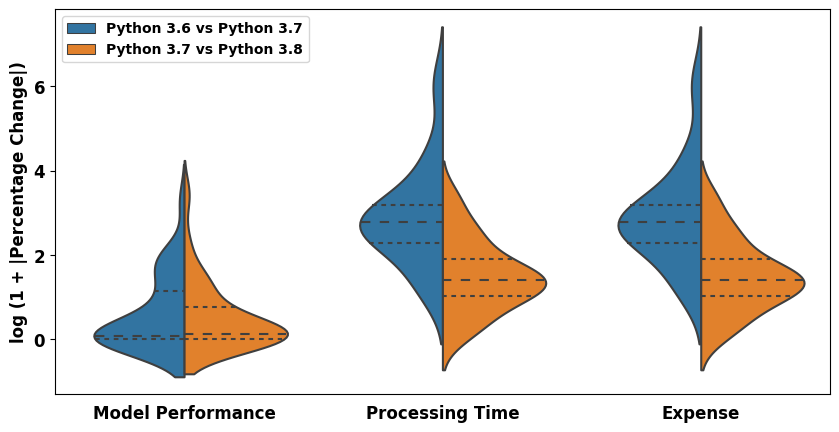

In [69]:
two_sided_vlpot_py(res_df)

In [70]:
def two_sided_vlpot_hw(full_df):
    #full_df = full_df.loc[res_df['Metric'] == metric, :]
    project = []
    pct_chng = []
    hw = []
    metric = []
    for index, row in full_df.iterrows():
        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(row['hw_arm64'])
        hw.append("AMD64 vs ARM64")

        project.append(row['Project'])
        metric.append(row['Metric'])
        pct_chng.append(np.nan)
        hw.append("")

    df = pd.DataFrame({'Project' : project,
                       'Metric' : metric,
                      'Percentage Change' : pct_chng,
                      'CPU Architecture' : hw})
    df['Metric'] = ['Model\nPerformance' if met == 'Score' else met.replace("_", " ") for met in df['Metric']]
    #return df

    plt.figure(figsize = (10, 5))

    sns.violinplot(data = df, y = 'Metric', x = np.log(1 + np.abs(df['Percentage Change'])), hue = 'CPU Architecture', split = True, inner="quart", fill=False, orient = 'h');
    #plt.legend(["Linux vx MacOS", "Linux vs Windows"])
    plt.tick_params(bottom = False)
    plt.ylabel("")
    plt.xlabel("log (1 + |Percentage Change|)", fontsize = 12, weight = 'bold')
    plt.yticks(ticks = [0, 1, 2], labels = ['Model\nPerformance', 'Processing\nTime', 'Expense'], fontsize = 12, weight = 'bold')
    plt.xticks(fontsize = 12, weight = 'bold')
    plt.legend(loc='upper right', fontsize = 12, prop=dict(weight='bold'))
    plt.savefig(f'../plots/pct_diff_hw_all_metric.pdf', format = 'pdf', dpi = 300, bbox_inches='tight', transparent="True", pad_inches=0.02);

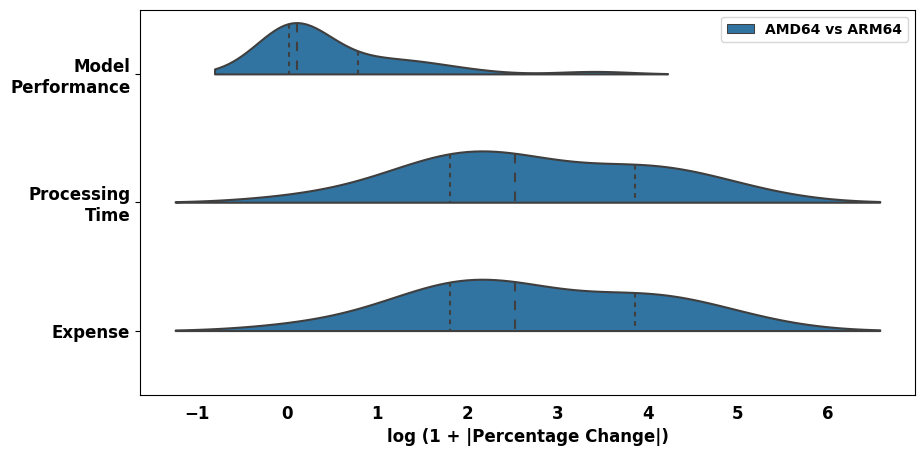

In [71]:
two_sided_vlpot_hw(res_df)